In [6]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import cmocean.cm as cm 
from IPython.display import display, Math, Latex
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools
import xarray as xr
import gsw

%matplotlib inline

In [9]:
fname = '/ocean/ssahu/CANYONS/wcvi/initial_conditions/West_coast_NEMO_IC_high_resolution_wide_bdy.nc'

gridT = xr.open_dataset(fname)

In [50]:
lats = gridT['nav_lat'][:]
lons = gridT['nav_lon'][:]
sal = gridT['vosaline'][0,...]
temp = gridT['votemper'][0,...]
zlevels = gridT['deptht'][:]
z = np.multiply(zlevels[:],-1)

In [51]:
pressure = gsw.p_from_z(z, np.mean(lats))

In [61]:
(N2, p_mid) = gsw.stability.Nsquared(sal, temp, pressure_input, lat=None, axis=0)

N = np.sqrt(N2)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


AttributeError: 'tuple' object has no attribute 'shape'

In [56]:
np.mean(N_sqr)

279.64036455416903

In [53]:
pressure_input=np.zeros_like(sal)

for i in np.arange(pressure_input.shape[0]):
    for j in np.arange(pressure_input.shape[1]):
        for k in np.arange(pressure_input.shape[2]):
            pressure_input[i,j,k] = pressure[i]

In [44]:
np.mean(lats)

<xarray.DataArray 'nav_lat' ()>
array(48.34238815307617)

In [54]:
pressure_input

array([[[    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037],
        [    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037],
        [    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037],
        ..., 
        [    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037],
        [    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037],
        [    9.83419037,     9.83419037,     9.83419037, ...,
             9.83419037,     9.83419037,     9.83419037]],

       [[   19.61459351,    19.61459351,    19.61459351, ...,
            19.61459351,    19.61459351,    19.61459351],
        [   19.61459351,    19.61459351,    19.61459351, ...,
            19.61459351,    19.61459351,    19.61459351],
        [   19.61459351,

In [52]:
pressure

array([    9.83419081,    19.61459432,    29.4840465 ,    39.46210314,
          49.57261257,    59.84465389,    70.31366029,    81.022816  ,
          92.02466759,   103.38316314,   115.17601595,   127.49759687,
         140.46232135,   154.20870885,   168.90412331,   184.75031914,
         201.98974841,   220.91283171,   241.86581083,   265.25954194,
         291.57826403,   321.38850351,   355.34685974,   394.20595643,
         438.81671846,   490.12568702,   549.16518651,   617.03454877,
         694.87067761,   783.80776064,   884.9274258 ,   999.20148455,
        1127.43359427,  1270.20543987,  1427.83591114,  1600.35716624,
        1787.51445021,  1988.78644474,  2203.42475934,  2430.50728266])

In [16]:
lats.shape

(390, 290)

In [43]:
zlevels

<xarray.DataArray 'deptht' (deptht: 40)>
array([    9.7511425 ,    19.44849014,    29.23366356,    39.1260376 ,
          49.14923859,    59.33207321,    69.7096405 ,    80.32471466,
          91.2293396 ,   102.48684692,   114.17419434,   126.38482666,
         139.23202515,   152.85292053,   167.41317749,   183.11247253,
         200.1907196 ,   218.9352417 ,   239.68850708,   262.85678101,
         288.91873169,   318.43414307,   352.05148315,   390.51361084,
         434.65979004,   485.42272949,   543.81848145,   610.9274292 ,
         687.86468506,   775.73974609,   875.60675049,   988.40753174,
        1114.91381836,  1255.67419434,  1410.97424316,  1580.8137207 ,
        1764.9074707 ,  1962.70678711,  2173.43969727,  2396.16479492], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 9.75114 19.4485 29.2337 39.126 49.1492 59.3321 ...
Attributes:
    long_name: Vertical T Levels
    units: m
    positive: down

In [62]:
N.shape

(39, 390, 290)

In [73]:
np.nanmax(N)

0.035789498226021829

In [75]:
np.nanmin(N)

0.0

In [70]:
np.where(np.nanmax(N[0,0,:]))

(array([0]),)

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


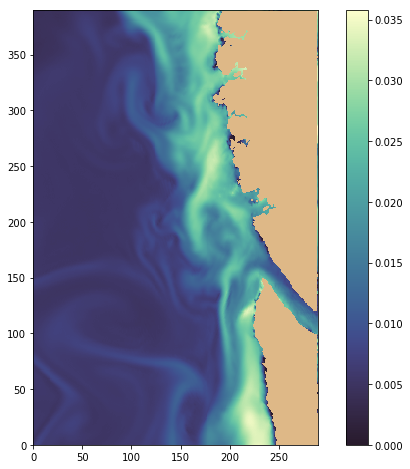

In [79]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

N0 = np.ma.masked_values(N[0,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0, cmap=cmap, vmin = 0, vmax = 0.035789498226021829)
cbar = fig.colorbar(mesh)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# cbar.set_label('Sea surface height (in m)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


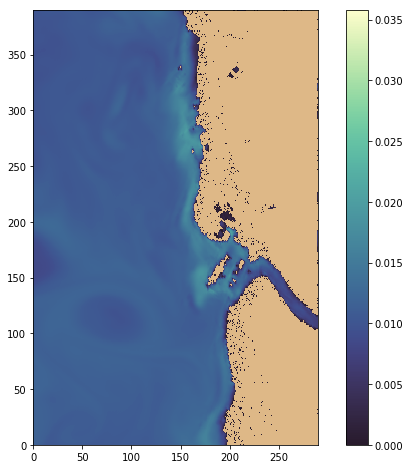

In [82]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

N0 = np.ma.masked_values(N[10,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0, cmap=cmap, vmin = 0, vmax = 0.035789498226021829)
cbar = fig.colorbar(mesh)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# cbar.set_label('Sea surface height (in m)')